Accuracy: 1.0


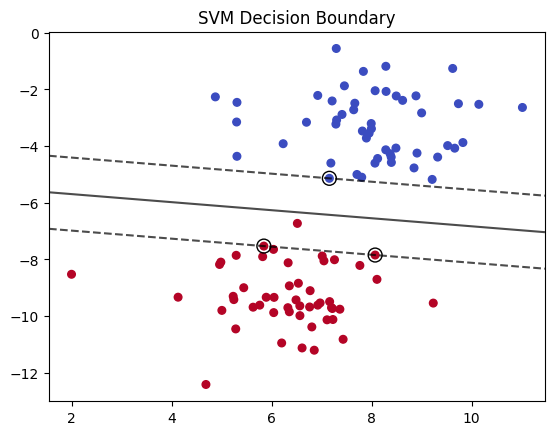

In [2]:
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 2: Create sample data (two classes)
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6, cluster_std=1.2)

# Step 3: Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train an SVM classifier
model = SVC(kernel='linear')  # linear kernel = straight boundary
model.fit(X_train, y_train)

# Step 5: Test accuracy
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))

# Step 6: Visualize decision boundary
def plot_svm_boundary(model, X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.7, linestyles=['--', '-', '--'])

    # Support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
               s=100, linewidth=1, facecolors='none', edgecolors='k')
    plt.title("SVM Decision Boundary")
    plt.show()

plot_svm_boundary(model, X, y)
